In [1]:
# PCA方法
# 函数原型: sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
# 官方文档: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA
# 相关说明: https://www.jianshu.com/p/8642d5ea5389

[0.94035142 0.05964858]


Text(0.5, 1.0, 'Dimensionality Reduced')

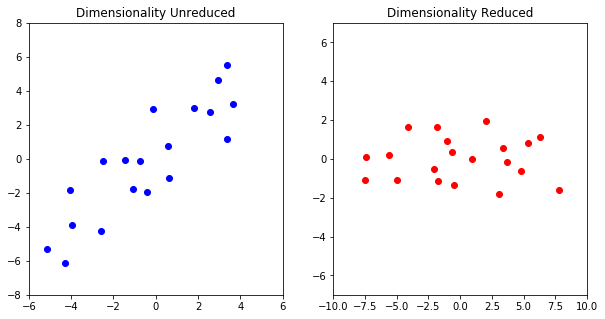

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.linspace(-5, 5, 20)
X = X.reshape((X.shape[0], 1))
X = np.concatenate((X, X), axis=1)
X = X + np.random.normal(loc=0, scale=1, size=X.shape)

# PCA训练器
pca = PCA(n_components=2, copy=True, whiten=False)
# 训练并降维
newX = pca.fit_transform(X)
# 对数据降维
TransX = pca.transform(X)
# 将降维后数据逆变换回原数据
pca.inverse_transform(newX)
# 各个特征的方差百分比
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:, 1], color='b')
plt.xlim(xmin=-6, xmax=6)
plt.ylim(ymin=-8, ymax=8)
plt.title('Dimensionality Unreduced')
plt.subplot(1, 2, 2)
plt.scatter(newX[:,0], newX[:, 1], color='r')
plt.xlim(xmin=-10, xmax=10)
plt.ylim(ymin=-7, ymax=7)
plt.title('Dimensionality Reduced')